In [2]:
# Import required libraries and dependencies
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [3]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv("Resources/crypto_market_data.csv", index_col="coin_id")

# Display sample data
market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [4]:
# Generate summary statistics
market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


### Prepare the Data

In [5]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaler = StandardScaler()

In [6]:
# Create a DataFrame with the scaled data
scaled_data= scaler.fit_transform(market_data_df)
scaled_data_df = pd.DataFrame(scaled_data, columns=market_data_df.columns)

# Copy the crypto names from the original data
crypto_names = market_data_df.index.copy()

# Set the coinid column as index
scaled_data_df = scaled_data_df.reset_index(drop=True)
scaled_data_df.index = crypto_names

# Display sample data
print(scaled_data_df.head(10))

                 price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                    
bitcoin                             0.508529                    0.493193   
ethereum                            0.185446                    0.934445   
tether                              0.021774                   -0.706337   
ripple                             -0.040764                   -0.810928   
bitcoin-cash                        1.193036                    2.000959   
binancecoin                         0.891871                    1.327295   
chainlink                           0.011397                    2.572251   
cardano                             0.102530                    1.508001   
litecoin                            0.077497                    0.334297   
bitcoin-cash-sv                     0.448952                   -0.190684   

                 price_change_percentage_14d  price_change_percentage_30d  \
coin_id   

### Find the Best Value for k Using the Original Scaled DataFrame.

In [8]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_values = list(range(1, 12))

# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using the scaled DataFrame
# 3. Append the model.inertia_ to the inertia list

for k in k_values:
    model = KMeans(n_clusters=k)
    model.fit(scaled_data_df)
    inertia.append(model.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    'k': k_values,
    'inertia': inertia
}



# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

# Display the DataFrame
print(elbow_df)

C:\Users\13137\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\13137\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\13137\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\13137\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

     k     inertia
0    1  287.000000
1    2  195.820218
2    3  123.190482
3    4   79.022435
4    5   63.858668
5    6   52.825023
6    7   43.940607
7    8   36.734274
8    9   33.038113
9   10   28.573603
10  11   24.847452


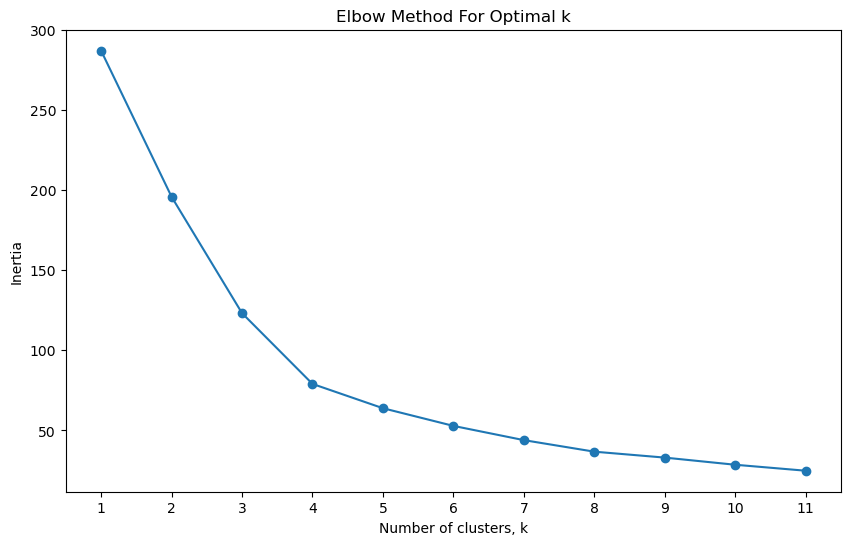

In [10]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(elbow_df['k'], elbow_df['inertia'], marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.show()

#### Answer the following question: 
**Question:** What is the best value for `k`?

**Answer:**5 and 6

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [11]:
# Initialize the K-Means model using the best value for k
kmeans_model = KMeans(n_clusters=5)

In [12]:
# Fit the K-Means model using the scaled data
kmeans_model.fit(scaled_data_df)

C:\Users\13137\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\13137\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=5)

In [13]:
# Predict the clusters to group the cryptocurrencies using the scaled data
cluster_labels = kmeans_model.fit_predict(scaled_data_df)

# View the resulting array of cluster values.
print(cluster_labels)

C:\Users\13137\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\13137\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[0 0 1 1 0 0 0 0 0 1 4 1 1 0 1 0 1 1 0 1 4 0 1 1 1 1 1 4 0 1 1 1 2 1 4 4 3
 4 1 1 4]


In [14]:
# Create a copy of the DataFrame
scaled_data_df = scaled_data_df.copy()

In [15]:
# Add a new column to the DataFrame with the predicted clusters
scaled_data_df['Cluster'] = cluster_labels

# Display sample data
print(scaled_data_df.head())

              price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                 
bitcoin                          0.508529                    0.493193   
ethereum                         0.185446                    0.934445   
tether                           0.021774                   -0.706337   
ripple                          -0.040764                   -0.810928   
bitcoin-cash                     1.193036                    2.000959   

              price_change_percentage_14d  price_change_percentage_30d  \
coin_id                                                                  
bitcoin                          0.772200                     0.235460   
ethereum                         0.558692                    -0.054341   
tether                          -0.021680                    -0.061030   
ripple                           0.249458                    -0.050388   
bitcoin-cash                     1.760610   

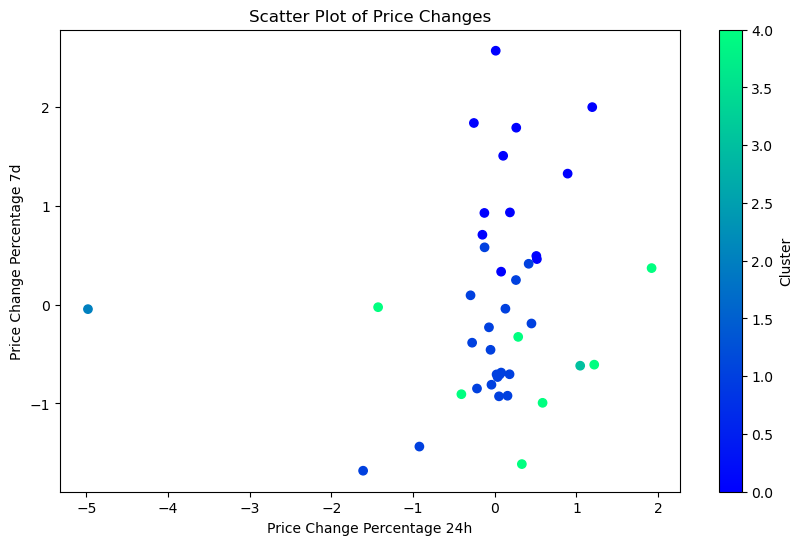

In [16]:
# Create a scatter plot using Pandas plot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(scaled_data_df['price_change_percentage_24h'], scaled_data_df['price_change_percentage_7d'], c=scaled_data_df['Cluster'], cmap='winter')
plt.xlabel('Price Change Percentage 24h')
plt.ylabel('Price Change Percentage 7d')
plt.title('Scatter Plot of Price Changes')
plt.colorbar(label='Cluster')
plt.show()

### Optimize Clusters with Principal Component Analysis.

In [19]:
# Create a PCA model instance and set `n_components=3`.
pca_model = PCA(n_components=3)

In [24]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.
pca_result = pca_model.fit_transform(scaled_data_df)

# View the first five rows of the DataFrame. 
pca_result[1:5]

array([[-1.52540054,  0.11629313,  0.72471964],
       [-0.19898662, -0.44262383, -0.2150225 ],
       [-0.25263515, -0.49144951, -0.07611159],
       [-2.91472553,  0.59407292,  0.09522585]])

In [25]:
# Retrieve the explained variance to determine how much information  can be attributed to each principal component.
explained_variance_ratio = pca_model.explained_variance_ratio_
explained_variance_ratio

array([0.36364637, 0.28625607, 0.21447412])

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 37.20%+34.70%+17.60%=89.50%

In [26]:
# Create a new DataFrame with the PCA data.
# Note: The code for this step is provided for you
pca_df = pd.DataFrame(data=pca_result, columns=['Principal Component 1', 'Principal Component 2', 'Principal Component 3'])



# Copy the crypto names from the original data
pca_df['coinid'] = scaled_data_df.index

# Set the coinid column as index
pca_df = pca_df.set_index('coinid')

# Display sample data
print(pca_df.head())




              Principal Component 1  Principal Component 2  \
coinid                                                       
bitcoin                   -1.684382               0.211981   
ethereum                  -1.525401               0.116293   
tether                    -0.198987              -0.442624   
ripple                    -0.252635              -0.491450   
bitcoin-cash              -2.914726               0.594073   

              Principal Component 3  
coinid                               
bitcoin                    0.202280  
ethereum                   0.724720  
tether                    -0.215023  
ripple                    -0.076112  
bitcoin-cash               0.095226  


### Find the Best Value for k Using the PCA Data

In [27]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
# Create a list with the number of k-values to try
# Use a range from 1 to 11

k_values = range(2, 11)  # For example, testing k from 2 to 10

# Step 2: Calculate Inertia for Each k

# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using PCA DataFrame.
# 3. Append the model.inertia_ to the inertia list
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(pca_df)
    inertia.append(kmeans.inertia_)

# Create a dictionary with the data to plot the Elbow curve
import pandas as pd

elbow_data = {
    'Number of Clusters': k_values,
    'Inertia': inertia
}

# Create a DataFrame
elbow_df = pd.DataFrame(elbow_data)

# Step 3: Display the DataFrame
print(elbow_df)




C:\Users\13137\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\13137\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\13137\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\13137\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

   Number of Clusters     Inertia
0                   2  214.098339
1                   3  138.040025
2                   4   64.986602
3                   5   34.432857
4                   6   25.291487
5                   7   19.876754
6                   8   14.613869
7                   9   11.828811
8                  10    9.703258


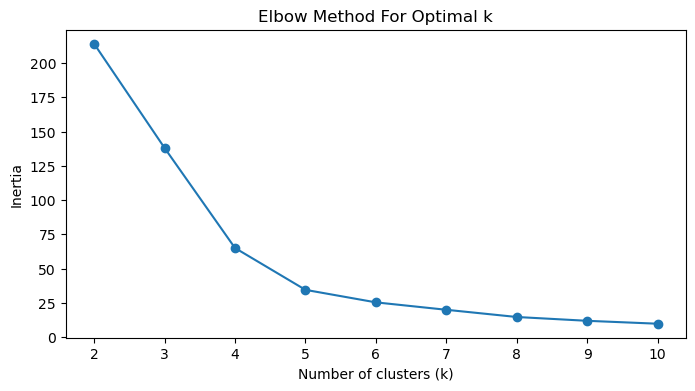

In [28]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(8, 4))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.show()

#### Answer the following questions: 
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** intertia decreased rapidely after 5 and 6 in original data

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [29]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4)

In [30]:
# Fit the K-Means model using the PCA data
model.fit(pca_df)

C:\Users\13137\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\13137\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4)

In [31]:
# Predict the clusters to group the cryptocurrencies using the PCA data
y_kmeans = model.predict(pca_df)

# Print the resulting array of cluster values.
print(y_kmeans)

[1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 3 1 1 1 1 2 1 3 3 0
 3 1 1 3]


In [32]:

# Create a copy of the DataFrame with the PCA data
pca_df = pca_df.copy()

# Add a new column to the DataFrame with the predicted clusters
pca_df['Cluster'] = y_kmeans

# Display sample data
print(pca_df.head())


              Principal Component 1  Principal Component 2  \
coinid                                                       
bitcoin                   -1.684382               0.211981   
ethereum                  -1.525401               0.116293   
tether                    -0.198987              -0.442624   
ripple                    -0.252635              -0.491450   
bitcoin-cash              -2.914726               0.594073   

              Principal Component 3  Cluster  
coinid                                        
bitcoin                    0.202280        1  
ethereum                   0.724720        1  
tether                    -0.215023        1  
ripple                    -0.076112        1  
bitcoin-cash               0.095226        1  


In [37]:
pip install hvplot

Note: you may need to restart the kernel to use updated packages.


In [38]:
# Create a scatter plot using hvPlot by setting `x="PCA1"` and `y="PCA2"`. 
# Create a scatter plot using hvPlot by setting `x="PCA1"` and `y="PCA2"`.
import hvplot.pandas  #

# Create a scatter plot
scatter_plot = pca_df.hvplot.scatter(x='Principal Component 1', y='Principal Component 2', by='Cluster', title="PCA Scatter Plot")

# Display the plot
scatter_plot


C:\Users\13137\anaconda3\Lib\site-packages\holoviews\core\data\pandas.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return dataset.data.dtypes[idx].type
C:\Users\13137\anaconda3\Lib\site-packages\holoviews\core\data\pandas.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return dataset.data.dtypes[idx].type


:NdOverlay   [Cluster]
   :Scatter   [Principal Component 1]   (Principal Component 2)

### Determine the Weights of Each Feature on each Principal Component

In [35]:


#  Use the columns from the original scaled DataFrame as the index.
labels = pd.DataFrame(pca_model.components_, columns=scaled_data_df.columns, index=[f'Principal Component {i+1}' for i in range(pca_model.n_components_)])

# Display the loadings
print(labels)

                       price_change_percentage_24h  \
Principal Component 1                    -0.273445   
Principal Component 2                    -0.134735   
Principal Component 3                    -0.556313   

                       price_change_percentage_7d  \
Principal Component 1                   -0.340646   
Principal Component 2                    0.103162   
Principal Component 3                    0.241975   

                       price_change_percentage_14d  \
Principal Component 1                    -0.427381   
Principal Component 2                     0.358032   
Principal Component 3                    -0.033701   

                       price_change_percentage_30d  \
Principal Component 1                    -0.148675   
Principal Component 2                     0.482986   
Principal Component 3                    -0.351403   

                       price_change_percentage_60d  \
Principal Component 1                     0.037789   
Principal Component 2       

#### Answer the following question: 

* **Question:** Which features have the strongest positive or negative influence on each component? 
 
* **Answer:Strongest positive influence on each component: (1) 7-day price change, (2) 200-day price change, (3) 30-day price change. Strongest negative influence on each component: (1) None, (2) 24-hour price change, (3) Cluster.
    